In [1]:
# Omitir este código
# Rutinas para visualizar puntos y líneas
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import sympy as sp
import math

a,b,c,d,e,f,x1,x2=sp.symbols('a b c d e f x_1 x_2')


def ejes(x0,y0,x1,y1,k=1):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    ax = plt.axes([0.,0.,k,k*1.34*(y1-y0)/(x1-x0)])
    ax.set_xlim(x0,x1)
    ax.set_ylim(y0,y1)
    punto2d(ax,(0,0),nombre=r'$\vec{0}$')
    return ax
  
def punto2d(ax,v,nombre='',fontsize=15,color='k',**kwargs):
    ax.scatter(*v,s=20,color=color)
    if nombre!='':
        ax.text(v[0],v[1],nombre,fontsize=fontsize)        

def puntos2d(ax,v,nombre='',fontsize=15,color='k',**kwargs):
    for j in range(v.shape[1]):
        punto2d(ax,v[:,j],nombre,fontsize,color,*kwargs)
    ax.plot(tuple(v[0,:]),tuple(v[1,:]))


# Transformaciones Afines

Sabemos que al sumar dos vectores de $\mathbb{R}^n$, uno de los vectores es desplazado por el otro vector. 

Para desplazar un conjunto de vectores que representan una figura, basta con sumar el mismo vector $v$ a todos los vectores de la figura. Esto permite definir la transformación $T_v:\mathbb{R}^n \rightarrow \mathbb{R}^n$ dada por
$$T_v(u)=u+v$$
En el caso de $\mathbb{R}^2$, para $v=\begin{pmatrix}a\\ b \end{pmatrix}$ queda
$$T_v\begin{pmatrix}x_1\\x_2 \end{pmatrix}=\begin{pmatrix}x_1\\x_2 \end{pmatrix}+\begin{pmatrix}a\\b \end{pmatrix}$$

que suma en mismo vector $v$ a todos vectores.

¿Será $T_v$ una transformación lineal?

Para saber si $T_v$ es una transformación lineal habíamos dicho que hay que verificar que
$$T_v(c_1u_1 + c_2 u_2)=c_1T_v(u_1) + c_2 T_v(u_2)$$
pero esto no se cumple

$\begin{aligned}
T(c_1u_1 + c_2 u_2)&=c_1u_1 + c_2 u_2 +v\\
c_1T_v(u_1) + c_2 T_v(u2_)&=c_1(u_1+v) + c_2 (u_2+v)=c_1u_1 + c_2 u_2 +(c_1+c_2)v\\
\end{aligned}$

ya que en el segundo caso no traslada $v$ sino $(c_1+c_2)v$.

Como $T_v$ no es una transformación lineal entonces no existe una matriz que permita trasladar vectores de $\mathbb{R}^2$.


A menos que... usemos el espacio vectorial 
<!-- $$V=\left\{\begin{pmatrix}1\\x_1\\x_2 \end{pmatrix}\mid x_1,x_2 \in \mathbb{R}  \right\}$$
Con la suma e y  -->

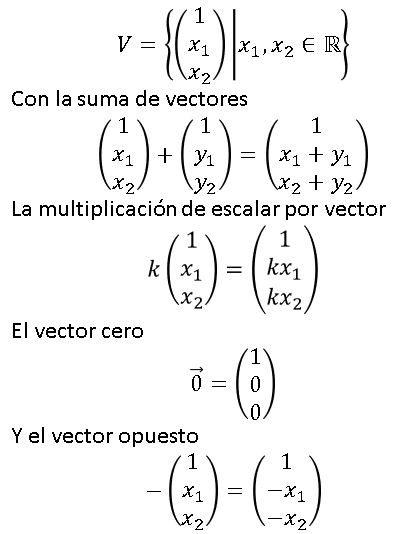

Observemos que pasa si multiplicamos la siguiente matriz 

In [2]:
A=sp.Matrix([[1,0,0],
             [a,c,e],
             [b,d,f]])
A

Matrix([
[1, 0, 0],
[a, c, e],
[b, d, f]])

por un vector de este espacio 

In [3]:
u=sp.Matrix([1,x1,x2])
u

Matrix([
[  1],
[x_1],
[x_2]])

In [4]:
w=A*u
w

Matrix([
[                1],
[a + c*x_1 + e*x_2],
[b + d*x_1 + f*x_2]])

Observemos que el primer elemento del vector `w` es 1. Por lo tanto, `w` pertenece al espacio vectorial $V$. También observemos que los demás elementos del vector `w` se pueden escribir de la siguiente forma <u>en términos de las operaciones usuales</u>
$$
\begin{pmatrix}y_1\\y_2 \end{pmatrix}=
\begin{pmatrix}a\\b \end{pmatrix}
+
\begin{pmatrix}c&e\\d&f \end{pmatrix}
\begin{pmatrix}x_1\\x_2 \end{pmatrix}
$$

Esto permite hacer una transformación matricial y trasladar el vector en una sola operación. Desafortunadamente esta transformación no es lineal. 


Las transformaciones de la forma

In [5]:
A

Matrix([
[1, 0, 0],
[a, c, e],
[b, d, f]])

se conocen como transformaciones afines.

En el caso de Matplotlib, la transformación es de la forma 

In [6]:
A=sp.Matrix([[c,e,a],
             [d,f,b],
             [0,0,1]])
A

Matrix([
[c, e, a],
[d, f, b],
[0, 0, 1]])

donde 
$\begin{pmatrix}c&e\\d&f \end{pmatrix}$
es la matriz de transformaciones lineales y
$\begin{pmatrix}a\\b \end{pmatrix}$ 
es el vector de translación.


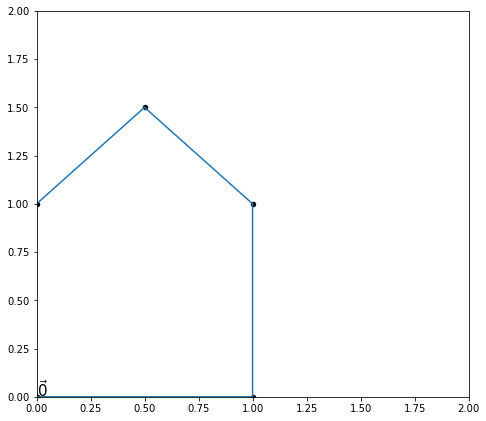

In [7]:
casa=sp.Matrix([[0. , 0. , 0.5, 1. , 1 , 0. ],
                [0. , 1. , 1.5, 1. , 0. , 0. ],
                [1  , 1  , 1  , 1  , 1  , 1  ]])
ax=ejes(0,0,2,2)
puntos2d(ax,casa[:2,:])
plt.show()

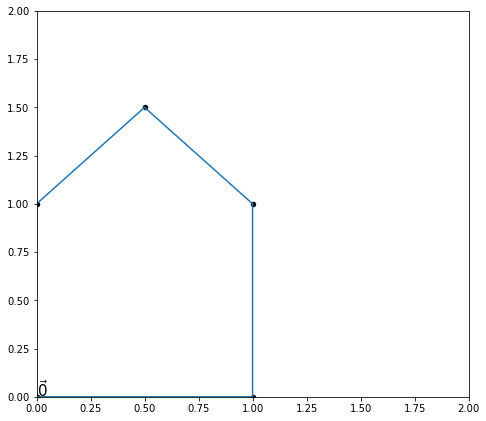

In [8]:
#Igual
A=sp.Matrix([[1,0,0],
             [0,1,0],
             [0,0,1]])
ax=ejes(0,0,2,2)
puntos2d(ax,(A*casa)[:2,:])
plt.show()

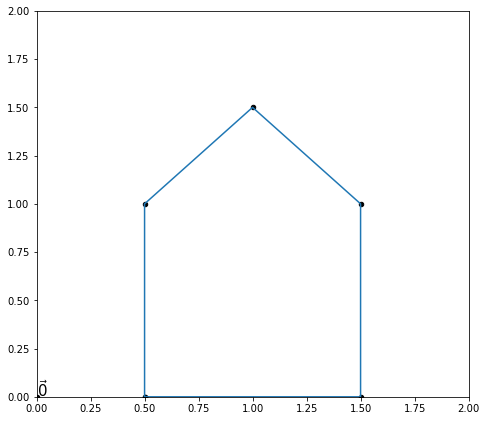

In [9]:
#Desplaza a la derecha
A=sp.Matrix([[1,0,0.5],
             [0,1,0],
             [0,0,1]])
ax=ejes(0,0,2,2)
puntos2d(ax,(A*casa)[:2,:])
plt.show()

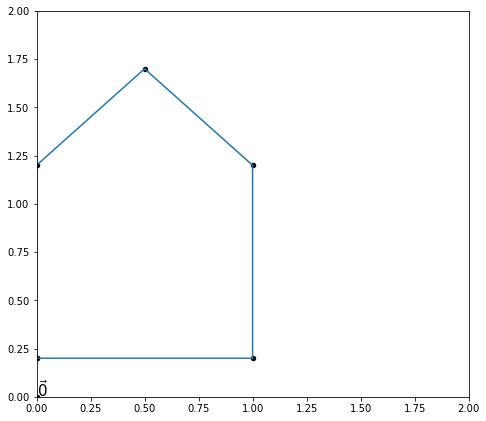

In [10]:
#Desplaza hacia arriba
B=sp.Matrix([[1,0,0],
             [0,1,0.2],
             [0,0,1]])
ax=ejes(0,0,2,2)
puntos2d(ax,(B*casa)[:2,:])
plt.show()

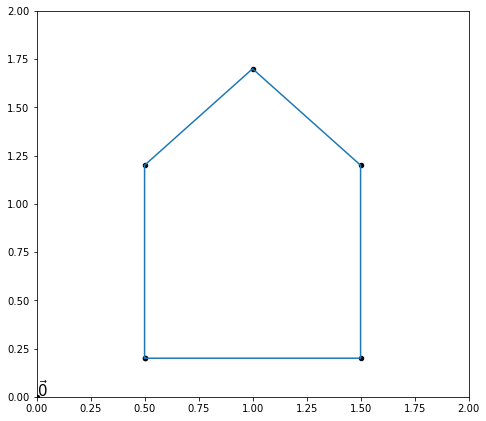

In [11]:
#Desplaza hacia arriba y ala derecha
#Multiplicando las matrices anteriores
ax=ejes(0,0,2,2)
puntos2d(ax,(A*B*casa)[:2,:])
plt.show()

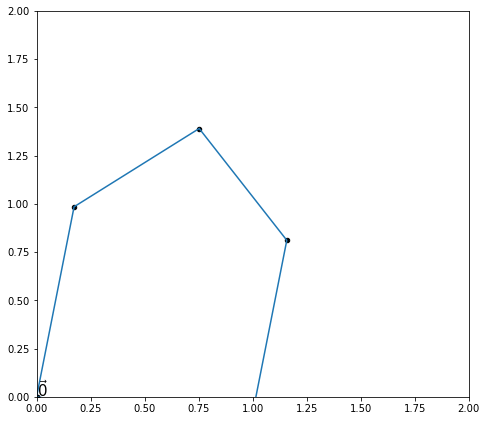

In [12]:
#Rota -10° alrededor de la esquina inferior izquierda
alfa=-10*sp.pi/180
c_alfa=sp.cos(alfa)
s_alfa=sp.sin(alfa)
C=sp.Matrix([[c_alfa, -s_alfa, 0],
             [s_alfa,  c_alfa, 0],
             [0     ,  0     , 1]])
ax=ejes(0,0,2,2)
puntos2d(ax,(C*casa)[:2,:])
plt.show()

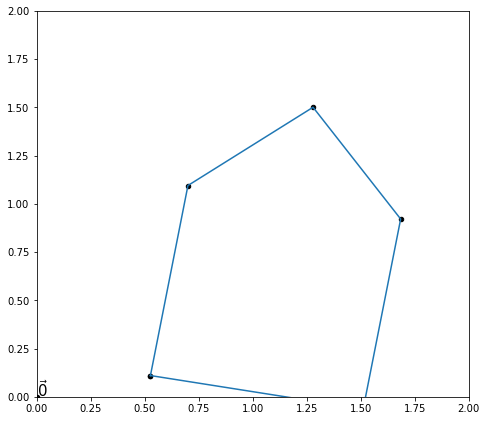

In [13]:
#Desplaza hacia arriba a la derecha y luego rota
ax=ejes(0,0,2,2)
puntos2d(ax,(C*A*B*casa)[:2,:])
plt.show()

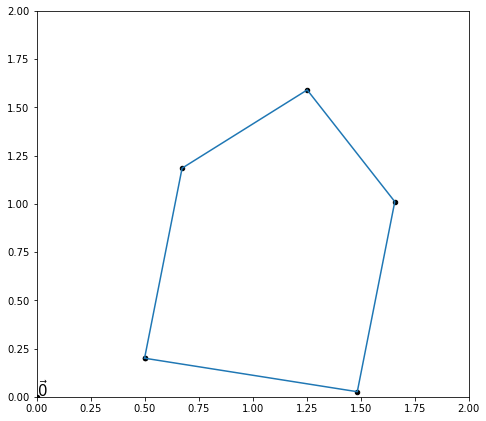

In [14]:
#Desplaza hacia arriba a la derecha y luego rota
ax=ejes(0,0,2,2)
puntos2d(ax,(A*B*C*casa)[:2,:])
plt.show()

Para aplicar las transformaciones afines sobre imágenes, usaremos la librería OpenCV. La función `cv2.warpAffine` además de realizar la transformación afín, identifica el color que le corresponde a cada punto transformado.

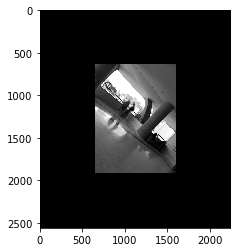

In [15]:
#imagen sin transformar
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('CorredorUD.jpg',0)
h,w=img.shape
img = np.pad(img,max(h//2,w//2))
plt.imshow(img, cmap = 'gray')#, interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [16]:
# Dimensiones de la imagen
h,w=img.shape
h,w

(2560, 2240)

[[1. 0. 0.]
 [0. 1. 0.]]


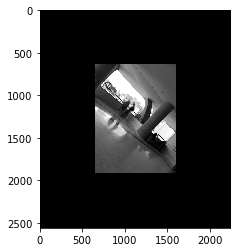

In [17]:
import numpy as np
#Igual
I=np.float32([[1,0,0],
              [0,1,0],
              [0,0,1]])
print(I[:2,:])
dst = cv2.warpAffine(img,I[:2,:],(w,h))
plt.imshow(dst, cmap = 'gray')
plt.show()

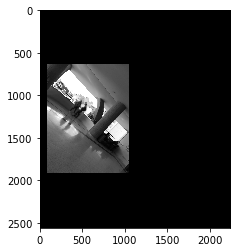

In [18]:
#Desplaza a la izquierda
A=np.float32([[1,0,-w//4],
              [0,1,0],
              [0,0,1]])
dst = cv2.warpAffine(img,A[:2,:],(w,h))
plt.imshow(dst, cmap = 'gray')
plt.show()

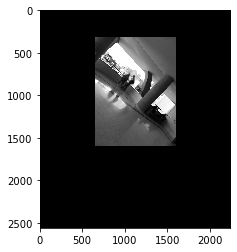

In [19]:
#Desplaza hacia arriba
B=np.float32([[1,0,0],
             [0,1,-h//8],
             [0,0,1]])
dst = cv2.warpAffine(img,B[:2,:],(w,h))
plt.imshow(dst, cmap = 'gray')
plt.show()

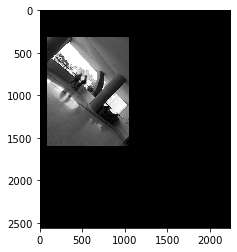

In [20]:
#Desplaza hacia la izquierda y arriba
dst = cv2.warpAffine(img,(B@A)[:2,:],(w,h))
plt.imshow(dst, cmap = 'gray')
plt.show()

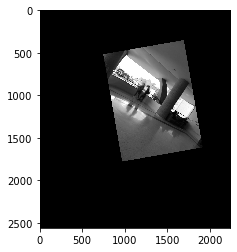

In [21]:
#Rota -10° respecto a la esquina superior izquierda
alfa=-10*sp.pi/180
c_alfa=sp.cos(alfa)
s_alfa=sp.sin(alfa)
C=np.float32([[c_alfa, -s_alfa, 0],
             [s_alfa,  c_alfa, 0],
             [0     ,  0     , 1]])
dst = cv2.warpAffine(img,C[:2,:],(w,h))
plt.imshow(dst, cmap = 'gray')
plt.show()

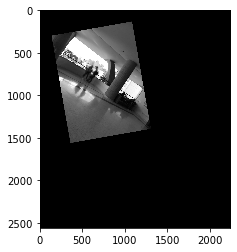

In [22]:
#Desplaza hacia la izquierda y arriba y luego rota
dst = cv2.warpAffine(img,(C@B@A)[:2,:],(w,h))
plt.imshow(dst, cmap = 'gray')
plt.show()

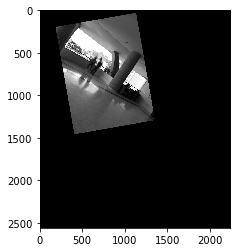

In [23]:
# Rota y luego desplaza hacia la izquierda y arriba 
dst = cv2.warpAffine(img,(B@A@C)[:2,:],(w,h))
plt.imshow(dst, cmap = 'gray')
plt.show()

El problema de esta semana consiste en encontrar la matriz
$$\begin{pmatrix}a11&a12&a13\\a21&a22&a23\\0&0&1 \end{pmatrix}$$
para obtener la siguiente imagen.

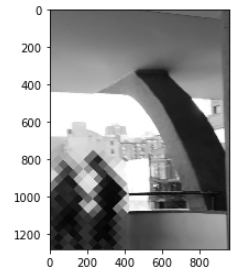

Recuerde que la rotación es alrededor de la esquina superior izquierda. Por lo tanto, debe trasladar antes y después de la transformación lineal. 

Le sugiero experimentar con algunas transformaciones para entender mejor cómo funcionan.

Recuerde que siempre es posible resumir varias transformaciones en una sola transformación. Que corresponde al producto de las trasformaciones. 